In [2]:
import pandas as pd
import numpy as np


In [3]:
# The following GWAS Summary Statistics is from GWAS Catalog
df1 = pd.read_csv(
    "GCST90018799.h.tsv",
    sep="\t"
)
df1.head()

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,variant_id,hm_coordinate_conversion,hm_code,rsid
0,1,13668,A,G,-0.4138,0.2733,0.005716,0.1300,NaN,lo,10,rs2691328
1,1,14506,A,G,-0.4047,0.2571,0.005682,0.1155,NaN,lo,10,rs1240557819
2,1,14717,A,G,-0.5758,0.5729,0.000775,0.3149,NaN,lo,10,rs377122907
3,1,14773,T,C,-0.1723,0.1617,0.017180,0.2866,NaN,lo,10,rs878915777
4,1,14860,T,G,0.1691,0.1915,0.012010,0.3772,NaN,lo,10,rs533499096


In [15]:
print(df1.columns.tolist())

['chromosome', 'base_pair_location', 'effect_allele', 'other_allele', 'beta', 'standard_error', 'effect_allele_frequency', 'p_value', 'variant_id', 'hm_coordinate_conversion', 'hm_code', 'rsid']


In [41]:
df1_pval_sig = df1[df1["p_value"] <= 5e-8]
df1_pval_sig

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,variant_id,hm_coordinate_conversion,hm_code,rsid
720930,1,87980553,A,G,0.1193,0.0216,0.054206,3.313000e-08,NaN,lo,10,rs17130230
989397,1,121471494,G,A,0.0841,0.0125,0.392685,1.840000e-11,NaN,lo,10,rs12134101
989678,1,121538815,G,A,0.0825,0.0115,0.307711,9.287000e-13,NaN,lo,10,rs11249433
990472,1,143279994,T,C,0.1863,0.0312,0.263500,2.356000e-09,NaN,lo,10,rs1437461076
990506,1,143284560,C,T,0.1893,0.0296,0.319100,1.603000e-10,NaN,lo,10,rs1457477682
...,...,...,...,...,...,...,...,...,...,...,...,...
23349347,22,40658455,A,G,0.0707,0.0116,0.260785,1.059000e-09,NaN,lo,10,rs56169543
23349367,22,40661666,T,C,0.0710,0.0116,0.260724,9.625000e-10,NaN,lo,10,rs113860965
23349370,22,40661973,T,C,0.0709,0.0116,0.260781,1.026000e-09,NaN,lo,10,rs7284506
23349376,22,40663167,G,A,0.0697,0.0116,0.264747,1.585000e-09,NaN,lo,10,rs79898470


In [42]:
df1_pval_sig_rsid = df1_pval_sig["rsid"]
df1_pval_sig_rsid

720930        rs17130230
989397        rs12134101
989678        rs11249433
990472      rs1437461076
990506      rs1457477682
                ...     
23349347      rs56169543
23349367     rs113860965
23349370       rs7284506
23349376      rs79898470
23349384      rs73171017
Name: rsid, Length: 3457, dtype: object

In [44]:
df1_pval_sig_rsid.to_csv(
    "gwas_rsid_5e8.txt",
    index = False,
    header = False
)

In [17]:
filepath = "annotated_df5.csv"
df2 = pd.read_csv(
   filepath,
    sep="\t"
)

df2

,›#Uploaded_variation,Location,Existing_variation,SYMBOL,Gene,SYMBOL.1,Consequence,IMPACT,CLIN_SIG,rsid,clinvar
0,1_1986896_A/G,1:1986896-1986896,rs765901754,PRKCZ,ENSG00000067606,PRKCZ,missense_variant,MODERATE,-,rs765901754,NaN
1,1_1986896_A/G,1:1986896-1986896,rs765901754,PRKCZ,ENSG00000067606,PRKCZ,upstream_gene_variant,MODIFIER,-,rs765901754,NaN
2,1_1986896_A/G,1:1986896-1986896,rs765901754,PRKCZ,ENSG00000067606,PRKCZ,missense_variant,MODERATE,-,rs765901754,NaN
3,1_1986896_A/G,1:1986896-1986896,rs765901754,PRKCZ,ENSG00000067606,PRKCZ,non_coding_transcript_exon_variant,MODIFIER,-,rs765901754,NaN
4,1_1986896_A/G,1:1986896-1986896,rs765901754,PRKCZ,ENSG00000067606,PRKCZ,non_coding_transcript_exon_variant,MODIFIER,-,rs765901754,NaN
...,...,...,...,...,...,...,...,...,...,...,...
101496,X_153138145_C/G,X:153138145-153138145,rs201990980,L1CAM,ENSG00000198910,L1CAM,non_coding_transcript_exon_variant,MODIFIER,"benign,likely_benign",rs201990980,NaN
101497,X_153138145_C/G,X:153138145-153138145,rs201990980,L1CAM,ENSG00000198910,L1CAM,upstream_gene_variant,MODIFIER,"benign,likely_benign",rs201990980,NaN
101498,X_153138145_C/G,X:153138145-153138145,rs201990980,L1CAM,ENSG00000198910,L1CAM,upstream_gene_variant,MODIFIER,"benign,likely_benign",rs201990980,NaN
101499,X_153138145_C/G,X:153138145-153138145,rs201990980,L1CAM,ENSG00000198910,L1CAM,missense_variant,MODERATE,"benign,likely_benign",rs201990980,NaN


In [18]:
print(df2.columns.tolist())

['›#Uploaded_variation', 'Location', 'Existing_variation', 'SYMBOL', 'Gene', 'SYMBOL.1', 'Consequence', 'IMPACT', 'CLIN_SIG', 'rsid', 'clinvar']


In [20]:
df2["rsid"].value_counts()

rsid
rs121434592     948
rs121913279     932
rs28934578      663
rs121912651     527
rs11540652      476
               ... 
rs1004071220      1
rs913362638       1
rs1237767299      1
rs148279547       1
rs752960380       1
Name: count, Length: 8939, dtype: int64

In [24]:
df1_pval_sig["rsid"].value_counts()

rsid
rs72758040     2
rs4752570      2
rs35301881     1
rs12050723     1
rs12050726     1
              ..
rs377455592    1
rs546810768    1
rs78059834     1
rs76077130     1
rs34315830     1
Name: count, Length: 13765, dtype: int64

In [26]:
df_inner_rsid = pd.merge(
    df1,
    df2,
    on="rsid",
    how="inner"
)
df_inner_rsid

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,variant_id,hm_coordinate_conversion,...,›#Uploaded_variation,Location,Existing_variation,SYMBOL,Gene,SYMBOL.1,Consequence,IMPACT,CLIN_SIG,clinvar
0,1,2144214,T,C,0.2885,0.3585,0.000361,0.4210,NaN,lo,...,1_2075653_C/T,1:2075653-2075653,"rs143527868,COSV66070211",PRKCZ,ENSG00000067606,PRKCZ,missense_variant,MODERATE,-,NaN
1,1,2144214,T,C,0.2885,0.3585,0.000361,0.4210,NaN,lo,...,1_2075653_C/T,1:2075653-2075653,"rs143527868,COSV66070211",PRKCZ,ENSG00000067606,PRKCZ,5_prime_UTR_variant,MODIFIER,-,NaN
2,1,2144214,T,C,0.2885,0.3585,0.000361,0.4210,NaN,lo,...,1_2075653_C/T,1:2075653-2075653,"rs143527868,COSV66070211",PRKCZ,ENSG00000067606,PRKCZ,5_prime_UTR_variant,MODIFIER,-,NaN
3,1,2144214,T,C,0.2885,0.3585,0.000361,0.4210,NaN,lo,...,1_2075653_C/T,1:2075653-2075653,"rs143527868,COSV66070211",PRKCZ,ENSG00000067606,PRKCZ,non_coding_transcript_exon_variant,MODIFIER,-,NaN
4,1,2144214,T,C,0.2885,0.3585,0.000361,0.4210,NaN,lo,...,1_2075653_C/T,1:2075653-2075653,"rs143527868,COSV66070211",PRKCZ,ENSG00000067606,PRKCZ,missense_variant,MODERATE,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,22,41178680,G,C,-0.8445,0.5394,0.000536,0.1174,NaN,lo,...,22_41574684_C/G,22:41574684-41574684,rs111489369,RP1-85F18.6,ENSG00000232754,RP1-85F18.6,"intron_variant,non_coding_transcript_variant",MODIFIER,"benign,likely_benign",NaN
5666,22,41178680,G,C,-0.8445,0.5394,0.000536,0.1174,NaN,lo,...,22_41574684_C/G,22:41574684-41574684,rs111489369,RP1-85F18.5,ENSG00000231993,RP1-85F18.5,"intron_variant,non_coding_transcript_variant",MODIFIER,"benign,likely_benign",NaN
5667,22,41178680,G,C,-0.8445,0.5394,0.000536,0.1174,NaN,lo,...,22_41574684_C/G,22:41574684-41574684,rs111489369,EP300,ENSG00000100393,EP300,synonymous_variant,LOW,"benign,likely_benign",NaN
5668,22,41178680,G,C,-0.8445,0.5394,0.000536,0.1174,NaN,lo,...,22_41574684_C/G,22:41574684-41574684,rs111489369,RP1-85F18.6,ENSG00000232754,RP1-85F18.6,"intron_variant,non_coding_transcript_variant",MODIFIER,"benign,likely_benign",NaN


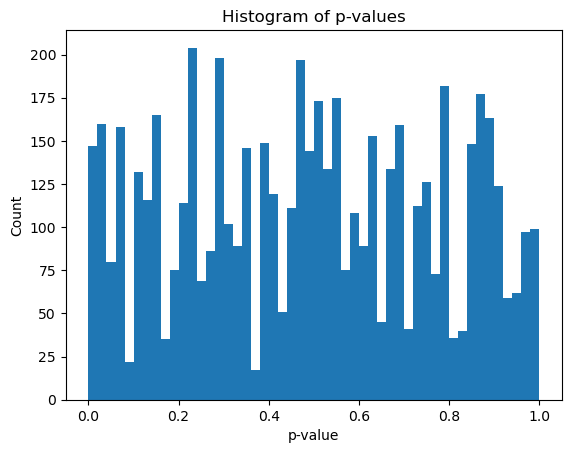

In [31]:
import matplotlib.pyplot as plt

plt.hist(df_inner_rsid["p_value"], bins=50)
plt.xlabel("p-value")
plt.ylabel("Count")
plt.title("Histogram of p-values")
plt.show()


In [33]:
df_inner_rsid["p_value"].min()

np.float64(0.0003049)

In [38]:
df_final_selected = df_inner_rsid[df_inner_rsid["p_value"] <= 0.001]

In [39]:
df_final_selected

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,variant_id,hm_coordinate_conversion,...,›#Uploaded_variation,Location,Existing_variation,SYMBOL,Gene,SYMBOL.1,Consequence,IMPACT,CLIN_SIG,clinvar
749,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
750,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
751,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
752,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
753,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
754,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,non_coding_transcript_exon_variant,MODIFIER,benign,NaN
755,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,synonymous_variant,LOW,benign,NaN
756,2,237340531,A,G,0.4805,0.1422,0.005393,0.000727,NaN,lo,...,2_238249174_G/A,2:238249174-238249174,rs201460305,COL6A3,ENSG00000163359,COL6A3,non_coding_transcript_exon_variant,MODIFIER,benign,NaN
811,2,237379158,A,G,1.3086,0.3741,0.000345,0.000469,NaN,lo,...,2_238287801_G/A,2:238287801-238287801,rs146291186,COL6A3,ENSG00000163359,COL6A3,missense_variant,MODERATE,"benign,uncertain_significance,likely_benign",NaN
812,2,237379158,A,G,1.3086,0.3741,0.000345,0.000469,NaN,lo,...,2_238287801_G/A,2:238287801-238287801,rs146291186,COL6A3,ENSG00000163359,COL6A3,intron_variant,MODIFIER,"benign,uncertain_significance,likely_benign",NaN


In [40]:
df_final_selected["SYMBOL"].value_counts()

SYMBOL
COL6A3    35
MYH9       8
Name: count, dtype: int64

In [47]:
df3 = pd.read_csv(
   "YsgwttzfOa1RqZXO.txt",
    sep="\t"
)

df3

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,rs17130230,1:88446236-88446236,A,intergenic_variant,MODIFIER,-,-,-,-,-,...,0.1256,-,-,1,34594039,-,-,-,-,-
1,rs17130230,1:88446236-88446236,C,intergenic_variant,MODIFIER,-,-,-,-,-,...,-,-,-,1,34594039,-,-,-,-,-
2,rs12134101,1:121213348-121213348,G,intergenic_variant,MODIFIER,-,-,-,-,-,...,0.1943,-,-,-,"27556229,30116257",-,-,-,-,-
3,rs11249433,1:121280613-121280613,C,"intron_variant,non_coding_transcript_variant",MODIFIER,EMBP1,ENSG00000231752,Transcript,ENST00000458200.1,unprocessed_pseudogene,...,-,-,-,1,"21514219,23193118,22433456,21738711,23535729,2...",-,-,-,-,-
4,rs11249433,1:121280613-121280613,G,"intron_variant,non_coding_transcript_variant",MODIFIER,EMBP1,ENSG00000231752,Transcript,ENST00000458200.1,unprocessed_pseudogene,...,0.1793,-,-,1,"21514219,23193118,22433456,21738711,23535729,2...",-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27281,rs12628403,HSCHR22_1_CTG2:39358034-39358034,G,intron_variant,MODIFIER,APOBEC3A,ENSG00000262156,Transcript,ENST00000570508.1,protein_coding,...,-,-,-,1,"24025454,26612672,27354352,27643540,34659891,3...",-,-,-,-,-
27282,rs12628403,HSCHR22_1_CTG2:39358034-39358034,A,"intron_variant,non_coding_transcript_variant",MODIFIER,APOBEC3B-AS1,ENSG00000262679,Transcript,ENST00000572413.1,antisense,...,-,-,-,1,"24025454,26612672,27354352,27643540,34659891,3...",-,-,-,-,-
27283,rs12628403,HSCHR22_1_CTG2:39358034-39358034,G,"intron_variant,non_coding_transcript_variant",MODIFIER,APOBEC3B-AS1,ENSG00000262679,Transcript,ENST00000572413.1,antisense,...,-,-,-,1,"24025454,26612672,27354352,27643540,34659891,3...",-,-,-,-,-
27284,rs12628403,HSCHR22_1_CTG2:39358034-39358034,A,downstream_gene_variant,MODIFIER,APOBEC3A,ENSG00000262156,Transcript,ENST00000572661.1,retained_intron,...,-,-,-,1,"24025454,26612672,27354352,27643540,34659891,3...",-,-,-,-,-


In [52]:
print(df3["SYMBOL"].unique().tolist())

['-', 'EMBP1', 'Y_RNA', 'U3', 'CASC10', 'MIR1915', 'SKIDA1', 'MLLT10', 'RNU6-306P', 'ZNF365', 'ZMIZ1', 'FGFR2', 'RP11-62L18.3', 'RPS15AP5', 'LSP1', 'MIR4298', 'AC051649.12', 'C11orf89', 'TNNT3', 'AC051649.1', 'AP000439.1', 'AP000439.5', 'AP000439.3', 'GNAI2P1', 'PTHLH', 'RP11-964E11.2', 'PAX9', 'RAD51B', 'CTD-2566J3.1', 'RN7SL706P', 'RN7SL108P', 'SCNN1B', 'PALB2', 'DCTN5', 'ERN2', 'TOX3', 'CASC16', 'RP11-297L17.2', 'RP11-297L17.3', 'RP11-297L17.4', 'FTO', 'MPHOSPH6', 'RP11-510J16.5', 'ATAD5', 'CTD-2349P21.11', 'TEFM', 'CHST9', 'AQP4-AS1', 'SLC14A2', 'CASP8', 'ALS2CR12', 'TRAK2', 'STRADB', 'AC007256.5', 'AC079610.1', 'AC007563.5', 'RP11-574O16.1', 'RN7SKP43', 'LINC00160', 'AP000330.8', 'PITPNB', 'TTC28-AS1', 'MIR3199-2', 'TTC28', 'CHEK2', 'CTA-292E10.6', 'ZNRF3', 'ZNRF3-IT1', 'ZNRF3-AS1', 'C22orf31', 'KREMEN1', 'EMID1', 'THOC5', 'NF2', 'SEC14L4', 'RP4-539M6.14', 'TCN2', 'APOBEC3A', 'ADSL', 'SGSM3', 'MKL1', 'RP5-1042K10.12', 'RP4-591N18.2', 'AL031594.1', 'COX6B1P3', 'RPL4P6', 'NEK10', 'M

In [53]:
df3["SYMBOL"].value_counts()

SYMBOL
NEK10         3333
RAD51B        2903
-             2549
FGFR2         2547
SLC4A7        2352
              ... 
RN7SKP43         1
AC079610.1       1
AC007256.5       1
AP000439.1       1
ZNRF3-AS1        1
Name: count, Length: 136, dtype: int64

In [ ]:
gwas_hugo_symbol = ['EMBP1', 'Y_RNA', 'U3', 'CASC10', 'MIR1915', 'SKIDA1', 'MLLT10', 'RNU6-306P', 'ZNF365', 'ZMIZ1',\
                    'FGFR2', 'RP11-62L18.3', 'RPS15AP5', 'LSP1', 'MIR4298', 'AC051649.12', 'C11orf89', 'TNNT3', 'AC051649.1',\
                    'AP000439.1', 'AP000439.5', 'AP000439.3', 'GNAI2P1', 'PTHLH', 'RP11-964E11.2', 'PAX9', 'RAD51B', 'CTD-2566J3.1',\
                    'RN7SL706P', 'RN7SL108P', 'SCNN1B', 'PALB2', 'DCTN5', 'ERN2', 'TOX3', 'CASC16', 'RP11-297L17.2', 'RP11-297L17.3',\
                    'RP11-297L17.4', 'FTO', 'MPHOSPH6', 'RP11-510J16.5', 'ATAD5', 'CTD-2349P21.11', 'TEFM', 'CHST9', 'AQP4-AS1',\
                    'SLC14A2', 'CASP8', 'ALS2CR12', 'TRAK2', 'STRADB', 'AC007256.5', 'AC079610.1', 'AC007563.5', 'RP11-574O16.1',\
                    'RN7SKP43', 'LINC00160', 'AP000330.8', 'PITPNB', 'TTC28-AS1', 'MIR3199-2', 'TTC28', 'CHEK2', 'CTA-292E10.6',\
                    'ZNRF3', 'ZNRF3-IT1', 'ZNRF3-AS1', 'C22orf31', 'KREMEN1', 'EMID1', 'THOC5', 'NF2', 'SEC14L4', 'RP4-539M6.14',\
                    'TCN2', 'APOBEC3A', 'ADSL', 'SGSM3', 'MKL1', 'RP5-1042K10.12', 'RP4-591N18.2', 'AL031594.1', 'COX6B1P3',\
                    'RPL4P6', 'NEK10', 'MINOS1P3', 'RNU6-342P', 'AC099535.1', 'SLC4A7', 'RN7SL859P', 'RPS20P15', 'AC099535.4',\
                    'RNU1-96P', 'FAM194A', 'RP11-103G8.2', 'RP11-103G8.1', 'SIAH2', 'SIAH2-AS1', 'ADAM29', 'RP13-577H12.3',\
                    'AC105914.1', 'TERT', 'RP11-473L15.3', 'RP11-503D12.1', 'RN7SL383P', 'RP11-53O19.1', 'RP11-53O19.2', 'MRPS30',\
                    'RP11-53O19.3', 'AC008940.1', 'MAP3K1', 'AC008937.2', 'snoU13', 'AC008937.3', 'SETD9', 'MIER3', 'CTD-2310F14.1',\
                    'AC016644.1', 'AC114973.1', 'EBF1', 'RP1-111D6.2', 'RP1-111D6.3', 'TAB2', 'RN7SL234P', 'CCDC170', 'RNU6-813P',\
                    'ESR1', 'RNU1-58P', 'KCNU1', 'AC090453.1', 'CASC8', 'RP11-382A18.2', 'RP11-438P9.2', 'APOBEC3B-AS1']